In [ ]:
!pip install missingpy
!pip install sklearn
!pip install tensorflow
!pip install scikit-learn --upgrade

In [25]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import random
from IPython.display import display

## Analysis

In [26]:
colums = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', '50K']
adult_train = pd.read_csv('adult_train.txt', sep=',', header=0, names=colums)
adult_test = pd.read_csv('adult_test.txt', sep=',', header=0, names=colums)

# 32561 instances, mix of continuous and discrete    (train=26048, test=6513)

In [27]:
adult_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,46,Private,415051,Some-college,10,Married-civ-spouse,Sales,Husband,Black,Male,0,0,60,United-States,>50K
1,28,Private,76129,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Guatemala,<=50K
2,19,?,192773,Some-college,10,Never-married,?,Own-child,White,Female,0,0,35,United-States,<=50K
3,43,Private,160369,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
4,22,?,121070,Some-college,10,Never-married,?,Own-child,White,Male,0,0,35,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,32,Private,176992,10th,6,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
26044,40,Private,55191,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
26045,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
26046,50,Private,192203,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [28]:
adult_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,54,Private,175262,7th-8th,4,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
1,17,Private,295991,10th,6,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K
2,60,Private,240521,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States,>50K
3,26,Private,236068,Some-college,10,Never-married,Sales,Other-relative,White,Female,0,0,20,United-States,<=50K
4,35,Private,186934,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,33,Self-emp-inc,374905,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
6509,41,Private,167106,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,3103,0,35,Philippines,>50K
6510,60,Private,223696,1st-4th,2,Divorced,Craft-repair,Not-in-family,Other,Male,0,0,38,Dominican-Republic,<=50K
6511,31,Private,101562,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,55,United-States,<=50K


In [29]:
# to see missing values in adult dataset

print(adult_train.isnull().sum()) # per label
print(adult_train.isnull().sum().sum()) # total
print(adult_test.isnull().sum())

# the missing values are not being recognized because they are written as "?"

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50K               0
dtype: int64
0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50K               0
dtype: int64


In [30]:
# to know the type and form of missing values in adult dataset
print('missing values:'+adult_train["workclass"][2]+')') # in row 4, column 1, we have a missing value and we will check its time and form
type(adult_train["workclass"][2])

# we saw that the missing values here are written as "?"

missing values:?)


str

In [31]:
# Making a list of possible missing value types 
missing_values = ["?", "n/a", "na", "Nan", " ", "nan", "NaN"]

# to set missing values to "NaN" in order to be recognized
df_train = pd.read_csv("adult_train.txt", sep=',', header=0, names=colums, na_values = missing_values)
df_test = pd.read_csv("adult_test.txt", sep=',', header=0, names=colums, na_values = missing_values)

df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,46,Private,415051,Some-college,10,Married-civ-spouse,Sales,Husband,Black,Male,0,0,60,United-States,>50K
1,28,Private,76129,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Guatemala,<=50K
2,19,NaN,192773,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,35,United-States,<=50K
3,43,Private,160369,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
4,22,NaN,121070,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,32,Private,176992,10th,6,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
26044,40,Private,55191,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
26045,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
26046,50,Private,192203,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [32]:
# check if the missing values are now recognized
print(df_test.isna().sum())  # yes :)

print('missing values in train: '+str(df_train.isna().sum().sum()))
print('missing values in test: '+str(df_test.isna().sum().sum()))

age                 0
workclass         365
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        366
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    107
50K                 0
dtype: int64
missing values in train: 3424
missing values in test: 838


In [33]:
# we will check the missing values row by row, column by column and save its index
index_train = []
for row in adult_train.iterrows():
    for j in row[1]:
        if j == '?':
            index_train.append(row[0])

index_test = []
for row in adult_test.iterrows():
    for j in row[1]:
        if j == '?':
            index_test.append(row[0])

#print(index) -> we have duplicated instances because there are instances with more than one missing value
# to clean duplicated index
seen = set()
index_train = [x for x in index_train if x not in seen and not seen.add(x)]  
seen = set()
index_test = [x for x in index_test if x not in seen and not seen.add(x)]  

print('number of index with missing values in train: '+str(len(index_train)))
print('number of index with missing values in test: '+str(len(index_test)))
print(str((len(index_test)+len(index_train))/(len(adult_train)+len(adult_test))*100)+'% have missing values.')
# 30162 if instances with unknown values are removed (train=24116, test=6046)

number of index with missing values in train: 1932
number of index with missing values in test: 467
7.367709836921471% have missing values.


In [34]:
# Class distribution

g50_train=[]
l50_train=[]
for i in range(0, len(df_train)):
    if df_train['50K'][i]=='<=50K':
        l50_train.append(i)
    if df_train['50K'][i]=='>50K':  
        g50_train.append(i)

g50_test=[]
l50_test=[]
for i in range(0, len(df_test)):
    if df_test['50K'][i]=='<=50K.':
        l50_test.append(i)
    if df_test['50K'][i]=='>50K.':  
        g50_test.append(i)

        
# Probability for the label '>50K':
print('Probability for the label >50K: '+str((len(g50_train)+len(g50_test))/(len(df_train)+len(df_test))*100) + '%')
# Probability for the label '<=50K':
print('Probability for the label =<50K: '+str((len(l50_train)+len(l50_test))/(len(df_train)+len(df_test))*100) + '%')


Probability for the label >50K: 19.308375049906328%
Probability for the label =<50K: 60.68916802309512%


In [35]:
# Remove instances with unknown values

df_train.drop(index_train, inplace=True)
df_test.drop(index_test, inplace=True)

# instances with unknown values were removed and now we have 30162 (train=24116, test=6046)

In [36]:
# to then compare the dataset D with the dataset with imputed values, we will make a copy of the df and order its index

D_train = df_train.copy()
D_train = D_train.sort_index(ignore_index = True)

D_test = df_test.copy()
D_test = D_test.sort_index(ignore_index = True)
display(D_train)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,46,Private,415051,Some-college,10,Married-civ-spouse,Sales,Husband,Black,Male,0,0,60,United-States,>50K
1,28,Private,76129,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Guatemala,<=50K
2,43,Private,160369,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
3,39,Private,160623,Assoc-acdm,12,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
4,39,Private,706180,Bachelors,13,Divorced,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24111,32,Private,176992,10th,6,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
24112,40,Private,55191,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
24113,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
24114,50,Private,192203,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [37]:
# Class distribution without unknowns

g50_train=[]
l50_train=[]
for i in df_train.index:
    if df_train['50K'][i]=='<=50K':
        l50_train.append(i)
    if df_train['50K'][i]=='>50K':  
        g50_train.append(i)

g50_test=[]
l50_test=[]
for i in df_test.index:
    if df_test['50K'][i]=='<=50K.':
        l50_test.append(i)
    if df_test['50K'][i]=='>50K.':  
        g50_test.append(i)

        
# Probability for the label '>50K':
print('Probability for the label >50K without unknowns: '+str((len(g50_train)+len(g50_test))/(len(df_train)+len(df_test))*100) + '%')
# Probability for the label '<=50K':
print('Probability for the label <=50K without unknowns: '+str((len(l50_train)+len(l50_test))/(len(df_train)+len(df_test))*100) + '%')

Probability for the label >50K without unknowns: 19.962204097871496%
Probability for the label <=50K without unknowns: 59.9927060539752%


## Hands-On

We "transformed" the Adult dataset into a new dataset without "?", assuming its name as dataset D (represented by D or df in the code) by removing all rows with "?". And now, we will test 3 different scenarios:

#### 3 - Some Numerical values removed
Randomly drop some values from some numerical features of this dataset D, just on test set, to be possible for the model learn in the train set.

In [38]:
# Randomly remove some values

# select some / all columns and just set 50% of values missing -> test
num_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

random.seed(36)
n = random.randint(1, len(num_features)) #number of columns to select
print(n)

selected_columns = []
for i in range(0,n):
    a = random.randint(0,len(num_features)-1) # select a column randomly
    if num_features[a] not in selected_columns: # to not repeat columns
        selected_columns.append(num_features[a]) # append column name to the list
    else: # if the column choosen is already in the list
        b = 0
        while b == 0:
            a = random.randint(0,len(num_features)-1) # select another column randomly
            if num_features[a] not in selected_columns: # to not repeat columns
                selected_columns.append(num_features[a]) # append column name to the list
                b = 1 # repeat this until the column choosen is not in the list 
        
print("Selected columns to remove values: " + str(selected_columns))

count = 0
for i in selected_columns:
    for j in df_test[i]:
        count += 1

print("Total number of values inside the selected columns: "+str(count))
number = int(0.50*count)
print("Number of values to be removed: "+str(number))

idx_test = df_test.index
for i in range(0, number):
    b = random.randint(0, len(selected_columns)-1)
    c = random.randint(0, len(idx_test)-1)
    if  df_test[selected_columns[b]][idx_test[c]] != "NaN":
        df_test.loc[idx_test[c], selected_columns[b]] = "NaN"
    else:
        d = 0
        while d == 0:
                b = random.randint(0, len(selected_columns)-1)
                c = random.randint(0, len(idx_test)-1)
                if  df_test[selected_columns[b]][idx_test[c]] != "NaN":
                    df_test.loc[idx_test[c], selected_columns[b]] = "NaN"
                    d = 1

# to check if there are "number" missing values
sum = 0
for row in df_test.iterrows():
    for j in row[1]:
        if j == "NaN":
            sum += 1
print("Number of values removed: "+str(sum))
print("Percentage of missing values, having in account the selected columns in test set: "+str((sum/count)*100)+"%")
# this does not forbid having more than one missing value per index - there are index with more than one missing value

df_test.to_csv("df_test_3")

3
Selected columns to remove values: ['age', 'education-num', 'capital-loss']
Total number of values inside the selected columns: 18138
Number of values to be removed: 9069
Number of values removed: 9069
Percentage of missing values, having in account the selected columns in test set: 50.0%


After dropped some values from the test set of D, we will impute them with the MissForest trained on the training set of D, obtaining a new complete dataset D' (named df2 in the code).

In [39]:
from sklearn import preprocessing
from missingpy import MissForest

# Label encodes the set of the features to be used for imputation
def label_encoding(df, columns): #df: data frame (processed data), columns: list (features to be encoded)
    
    encoders = dict()
    for col_name in columns:
        series = df[col_name]
        label_encoder = preprocessing.LabelEncoder()
        df[col_name] = pd.Series(
            label_encoder.fit_transform(series[series != "NaN"]),
            index=series[series != "NaN"].index
        )
        encoders[col_name] = label_encoder
    return encoders # Returns a dictionary



In [40]:
df_train
# without unknown values 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,46,Private,415051,Some-college,10,Married-civ-spouse,Sales,Husband,Black,Male,0,0,60,United-States,>50K
1,28,Private,76129,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Guatemala,<=50K
3,43,Private,160369,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
5,39,Private,160623,Assoc-acdm,12,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
6,39,Private,706180,Bachelors,13,Divorced,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,32,Private,176992,10th,6,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
26044,40,Private,55191,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
26045,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
26046,50,Private,192203,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [41]:
## Train set:

# categorical features
cat_features = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country', '50K']

# label encoding categorical features
encoders = label_encoding(df_train, cat_features)

# train the MissForest
imputer = MissForest()
train_imp = imputer.fit(df_train)

In [42]:
columns_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', '50K']
df2_train = pd.DataFrame(df_train, columns =  columns_names)

# decoding the features
for i in cat_features:
    df2_train[i] = encoders[i].inverse_transform(df2_train[i].astype(int))


# to replace floats of numerical features to int as in the original dataset
num_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

for i in num_features:
        df2_train[i] = df2_train[i].astype(int)
    
display(df2_train)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,46,Private,415051,Some-college,10,Married-civ-spouse,Sales,Husband,Black,Male,0,0,60,United-States,>50K
1,28,Private,76129,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Guatemala,<=50K
3,43,Private,160369,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
5,39,Private,160623,Assoc-acdm,12,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
6,39,Private,706180,Bachelors,13,Divorced,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,32,Private,176992,10th,6,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
26044,40,Private,55191,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
26045,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
26046,50,Private,192203,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [43]:
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,54,Private,175262,7th-8th,NaN,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,NaN,40,United-States,<=50K
1,17,Private,295991,10th,6,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K
2,NaN,Private,240521,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,NaN,40,United-States,>50K
3,NaN,Private,236068,Some-college,NaN,Never-married,Sales,Other-relative,White,Female,0,0,20,United-States,<=50K
4,35,Private,186934,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,33,Self-emp-inc,374905,HS-grad,NaN,Married-civ-spouse,Sales,Husband,White,Male,0,NaN,50,United-States,>50K
6509,41,Private,167106,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,3103,NaN,35,Philippines,>50K
6510,NaN,Private,223696,1st-4th,NaN,Divorced,Craft-repair,Not-in-family,Other,Male,0,0,38,Dominican-Republic,<=50K
6511,31,Private,101562,HS-grad,NaN,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,NaN,55,United-States,<=50K


In [44]:
## Test set:

# categorical features
cat_features = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country', '50K']

# label encoding categorical features
encoders = label_encoding(df_test, cat_features)

# impute the "NaN" values again with the MissForest trained on the train set of D
test_imp = train_imp.transform(df_test)

columns_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', '50K']
df2_test = pd.DataFrame(test_imp, columns =  columns_names)

# decoding the features
for i in cat_features:
    df2_test[i] = encoders[i].inverse_transform(df2_test[i].astype(int))


# to replace floats of numerical features to int as in the original dataset
num_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

for i in num_features:
        df2_test[i] = df2_test[i].astype(int)
    
display(df2_test)


# to check if this method worked
sum = 0
for row in df2_test.iterrows():
    for j in row[1]:
        if j == "NaN":
            sum += 1
print("Number of missing values in test set after MissForest-Imputation: "+str(sum))
# 0 missing values as it should be - indicates that MissFores-Imputation worked because now we don't have missing values, instead of them, we have imputed values in their place

/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarn

Iteration: 0


/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarn

Iteration: 1


/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarn

Iteration: 2


/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarn

Iteration: 3


/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarn

Iteration: 4


/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarn

Iteration: 5


/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarn

Iteration: 6


/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/anacp/miniconda3/envs/seminar_22_23/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarn

Iteration: 7


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,54,Private,175262,7th-8th,4,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
1,17,Private,295991,10th,6,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K
2,50,Private,240521,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,75,40,United-States,>50K
3,21,Private,236068,Some-college,10,Never-married,Sales,Other-relative,White,Female,0,0,20,United-States,<=50K
4,35,Private,186934,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041,33,Self-emp-inc,374905,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,19,50,United-States,>50K
6042,41,Private,167106,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,3103,56,35,Philippines,>50K
6043,53,Private,223696,1st-4th,2,Divorced,Craft-repair,Not-in-family,Other,Male,0,0,38,Dominican-Republic,<=50K
6044,31,Private,101562,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,17,55,United-States,<=50K


Number of missing values in test set after MissForest-Imputation: 0


## Evaluation

Now, we have two distant datasets: D (without imputed) and D' (with imputed values by MissForest and represented as df2).\
Firstly, we will drawn some conclusions based on the histograms between D and D'. 
Note that is only worthy to plot the histograms of the features where we removed values and imputed them with the MissForest. 

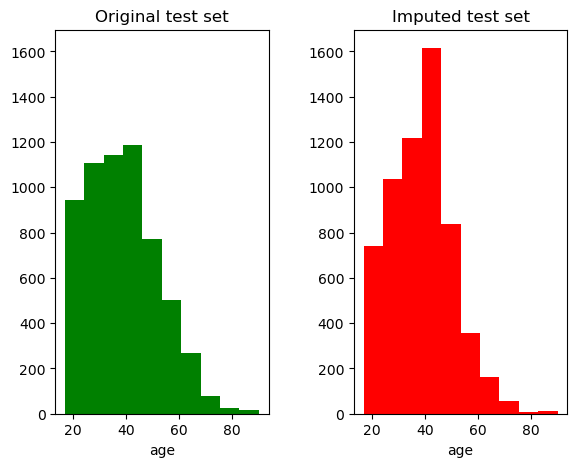

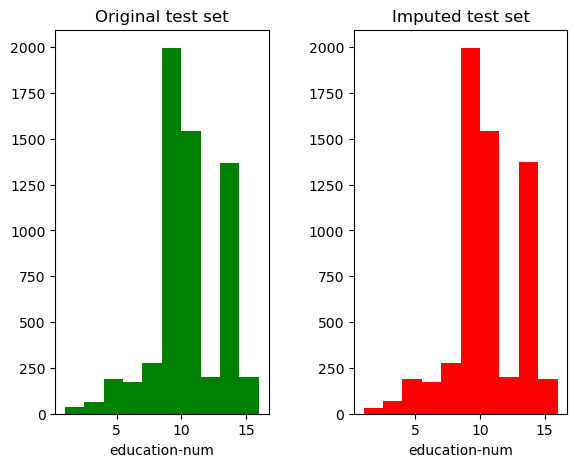

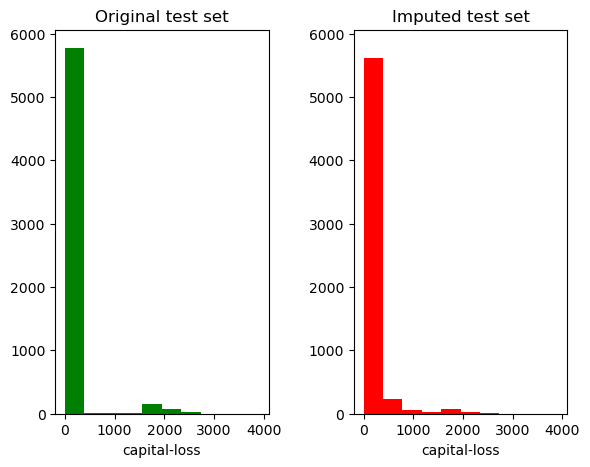

In [45]:
# Histograms: Numerical features

for i in selected_columns: #columns where we removed values to then impute them
    for j in num_features:
        if i == j: #to make the histogram of numerical features with imputed values:
            ax1 = plt.subplot(121, title = "Original test set", xlabel=i)
            ax1.hist(D_test[i], color = "green")
            ax2 = plt.subplot(1,2,2, sharex=ax1, sharey=ax1, title = "Imputed test set", xlabel=i)
            ax2.hist(df2_test[i], color = "red")

            plt.subplots_adjust(left=0.1, bottom = 0.1, top=0.9, wspace=0.4, hspace=0.4)
            plt.show()

Again, as we can see by the plotted histograms, for the categorical features the MissForest imputation produces more differences. Generally, the biggest amount is in agreement in both original and imputed data but when we check the next ones, they do not concorde at all (that means, e.g. the second biggest amout is not the same in both datasets). Based on this, we can say that these approach works better in numerical features than in categorical.

Now, we will measure the quality of the imputation by the mean squared error on the test set.

In [46]:
# Metric: Accuracy

from sklearn.metrics import accuracy_score

# label encoding categorical features
label_encoding(df2_test, cat_features)
label_encoding(D_test, cat_features)


print("Numerical features: \n")
for i in num_features:
    for j in selected_columns:
        if i == j:
            acc_test_column = sklearn.metrics.accuracy_score(D_test[i], df2_test[i])
            print("Accuracy on feature " + i +" = " + str(round(acc_test_column*100,2)) + "%")
    
    


Numerical features: 

Accuracy on feature age = 51.16%
Accuracy on feature education-num = 99.47%
Accuracy on feature capital-loss = 66.49%


In [47]:
# Metric: Mean squared error

from sklearn.metrics import mean_squared_error

num_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
cat_features = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country', '50K']

# Fisrtly, we will normalize the values of the numerical features
for i in num_features:
    mean_d = np.mean(D_test[i])
    std_d = np.std(D_test[i])
    mean_d2 = np.mean(df2_test[i])
    std_d2 = np.std(df2_test[i])
    
    for j in df2_test[i].index:
        D_test[i][j] = (D_test[i][j] - mean_d)/std_d
        df2_test[i][j] = (df2_test[i][j] - mean_d2)/std_d2

# And now, we will calculate the mean square error
mse_test_num = 0
mse_test_cat = 0

for i in num_features:
    mse_test_column = mean_squared_error(D_test[i], df2_test[i])
    mse_test_num += mse_test_column
    
# For categorical features, we will assume the distance as 1 if the words to be compared are not equal, and 0 if they are
for j in cat_features:
    dist = 0
    for k in D_test.index:
        if D_test[j][k]==df2_test[j][k]:
            dist += 0
        else:
            dist += 1
    mse_test_cat += dist/len(D_test[j])      
    
        
print(mse_test_num)
print(mse_test_cat)
mse_test = mse_test_num + mse_test_cat
print("Mean squared error on test set = " + str(mse_test))

/tmp/ipykernel_8045/2878398597.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_test[i][j] = (D_test[i][j] - mean_d)/std_d
/tmp/ipykernel_8045/2878398597.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_test[i][j] = (df2_test[i][j] - mean_d2)/std_d2


1.0640194749920298
0.0
Mean squared error on test set = 1.0640194749920298


Comparing the obtained accuracy with the histograms results, the "education-num" feature is in agreement with we said. However, we can see that the accuracy shows that MissForest works better in categorical features than in numerical features, contrary to what we conclude based on the histograms. This may be related to the fact that the numerical features have more labels than categorical features, because in the numerical features we just see the range between values and they can not look different when in reality they are, while in the categorical features they just have to belong to a discrete set of labels. 